<a href="https://colab.research.google.com/github/bray2020/AI-works/blob/main/Regression_model_using_FFNN_BOSTON_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from   tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers

**Regression Model using FFNN:**
Tasks being carried out:
- Understanding the data
- Exploratory data analysis
- Divide the data into train and test
- Building NN model
- Compile the model
- Fit the model on training data set (by taking validation data separately out of training data)
- Check whether there is an overfit by comparing training loss and validation loss
- Plot the loss
- If there is an overfit, try to overcome using some regularization technique

**Load the dataset:**

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)   #no of rows, colms/features

(506, 13)


In [ ]:
print(boston.DESCR)   #description od the data

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Store the boston data into a dataframe for easy manipulation:**

In [ ]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)    #load the data into a dataframe for easier manipulation
data.head()     #target MEDV is not included

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- Here the target column 'MEDV' is not present.

In [ ]:
data['MEDV'] = pd.Series(data=boston.target, index=data.index)     #add the target column to the dataframe
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Divide the data into train & test with 70% & 30% respectively:**

In [ ]:
train_dataset = data.sample(frac=0.7, random_state=0)
test_dataset = data.drop(train_dataset.index)

**Take the transpose of all the input features decription/summary data:**

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop('MEDV')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,354.0,3.767375,9.418497,0.00906,0.082757,0.274475,3.077295,88.9762
ZN,354.0,11.079096,23.070178,0.00000,0.000000,0.000000,12.500000,95.0000
INDUS,354.0,11.185254,6.646944,0.74000,5.860000,9.795000,18.100000,27.7400
CHAS,354.0,0.070621,0.256554,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,354.0,0.554098,0.115748,0.38500,0.453000,0.538000,0.624000,0.8710
RM,354.0,6.265791,0.699380,3.56100,5.878250,6.175000,6.605500,8.7800
AGE,354.0,68.057627,27.953167,6.00000,45.100000,76.500000,93.750000,100.0000
DIS,354.0,3.844439,2.187514,1.12960,2.073700,3.207450,5.214600,12.1265
RAD,354.0,9.440678,8.569207,1.00000,4.000000,5.000000,20.000000,24.0000
TAX,354.0,407.500000,162.296676,187.00000,287.000000,337.000000,666.000000,711.0000


**Split the input features from the target/label column:**
- Separating the target/label column 'MEDV' from the features of both train and test.

In [ ]:
train_labels = train_dataset.pop('MEDV')    #Y_train
test_labels = test_dataset.pop('MEDV')      #Y_test

**Normalize the data:**
Looking at the train_stats we can see that the ranges of each feature are different.

- It is good practice to normalize features that use different scales and ranges. Although the model might converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.


In [ ]:
def norm(x):
  return (x- train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

**Build the model:**

In [ ]:
def build_model():

  model = keras.Sequential([
                            layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]),   #This is the 1st hidden layer, 64 neurons, input shape is=(13, ) because 13 input features and each feature is a 1-D column vector.
                            layers.Dense(64, activation="relu"),                                            #This is for the 2nd h.layer, here also we have given 64 neurons, no need to give the input shape cause it is a fully coonected NN. So each neuron is connected to each neuron of it's previous layer. 
                            layers.Dense(1)                                                                 #This is the output layer, no activation func is needed cause it is a regression problem.So the output y can take value ranging from -infinity to +infinity. Hence, no need of applying any activation func to change the output form (Classification it is required)
                            ])
  
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)   #default learning rate is 0.001, instead of GD or SGD we used RMSprop here

  model.compile(loss="mse",                                      #loss in regression always use 'mse', we want to check the performance of the model wrt all these 3 matrics and not just a single 1
                optimizer=optimizer,
                metrics=['mae','mse','mape'])
  
  return model

In [ ]:
model = build_model()

In [ ]:
#print the model summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


- Now try out the model. take a batch of 10 examples from the training data and call 'model.predict' on it.

In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result  

array([[ 0.24287616],
       [-0.02229451],
       [ 0.27848428],
       [-0.5364907 ],
       [ 0.28435817],
       [ 0.13140312],
       [-0.10808946],
       [ 0.23725471],
       [-0.18800722],
       [ 0.7754398 ]], dtype=float32)

**Train the model or run the model:**

Train the model for 1000 epochs, and record the training and validation accuracy in the history object. Note the validation_split set us use 20% of the training data as validation set and the remainder as calibration. Important to note that this is separate from the testing dta we do not touch in the model-training.

**RUN1:**
- with 1000 epochs, 20% validation data, verbose=1

In [ ]:
#display training progress by printing a single dot for each complete epoch
class PrintDot(keras.callbacks.Callback):
  def op_epoch_end(self,epoch,logs):
    if epoch % 100 ==0:
      print('')
    print(".",end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,                   #normed_train_data are the x values and train_labels is the train set y values. If we give verbose=0 then we will not be able to see the below output displays.
    epochs=EPOCHS, validation_split = 0.2, verbose=1)        # , callbacks =[PrintDot()]

Epoch 1/1000
9/9 [==============================] - 1s 63ms/step - loss: 515.2299 - mae: 21.0959 - mse: 515.2299 - mape: 96.9730 - val_loss: 584.3487 - val_mae: 22.3589 - val_mse: 584.3487 - val_mape: 91.8474
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 488.6878 - mae: 20.1638 - mse: 488.6878 - mape: 89.1085 - val_loss: 517.4808 - val_mae: 20.9081 - val_mse: 517.4808 - val_mape: 84.9464
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 393.1797 - mae: 18.2362 - mse: 393.1797 - mape: 81.7118 - val_loss: 440.9079 - val_mae: 19.1278 - val_mse: 440.9079 - val_mape: 76.7740
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 327.8254 - mae: 16.4551 - mse: 327.8254 - mape: 72.7148 - val_loss: 360.8245 - val_mae: 17.0861 - val_mse: 360.8245 - val_mape: 68.0339
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 269.3270 - mae: 14.5305 - mse: 269.3270 - mape: 62.8751 - val_loss: 284.0209 - val_mae: 14.8571

- Note the 'Validation set' here : Out of the train set (70%), we are taking 20% as validation purpose.

**RUN2:**
- with same epochs and validation data but verbose=0
- when verbose=0, it means there will be no display of the model's run history

In [ ]:
#Now simply give "verbose=0" and run again the above code once again:
class PrintDot(keras.callbacks.Callback):
  def op_epoch_end(self,epoch,logs):
    if epoch % 100 ==0:
      print('')
    print(".",end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,                     
    epochs=EPOCHS, validation_split = 0.2, verbose=0)          # , callbacks =[PrintDot()]

**RUN3:**
- only added parameter is : callbacks =[PrintDot()]

In [ ]:
#Now add ", callbacks =[PrintDot()]" after the verbose=1 and again run the code:
class PrintDot(keras.callbacks.Callback):
  def op_epoch_end(self,epoch,logs):
    if epoch % 100 ==0:
      print('')
    print(".",end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,                   
    epochs=EPOCHS, validation_split = 0.2, verbose=1, callbacks =[PrintDot()])  

Epoch 1/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1814 - mae: 0.3142 - mse: 0.1814 - mape: 1.6136 - val_loss: 34.9759 - val_mae: 3.1316 - val_mse: 34.9759 - val_mape: 22.7871
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.3564 - mae: 0.4742 - mse: 0.3564 - mape: 2.4344 - val_loss: 33.5259 - val_mae: 2.9601 - val_mse: 33.5259 - val_mape: 21.5606
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1941 - mae: 0.3103 - mse: 0.1941 - mape: 1.4872 - val_loss: 32.1973 - val_mae: 2.9465 - val_mse: 32.1973 - val_mape: 20.8799
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.4377 - mae: 0.5195 - mse: 0.4377 - mape: 2.5684 - val_loss: 34.0828 - val_mae: 2.9790 - val_mse: 34.0828 - val_mape: 21.8730
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1909 - mae: 0.3106 - mse: 0.1909 - mape: 1.5048 - val_loss: 34.0551 - val_mae: 2.9695 - val_mse: 34.0551 - val_mape: 21.8532
Epoc

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
995,0.242525,0.370169,0.242525,2.115918,36.736412,3.182612,36.736412,23.249313,995
996,0.111323,0.260135,0.111323,1.249221,36.296482,3.118498,36.296482,22.612644,996
997,0.176142,0.347375,0.176142,1.727929,37.893353,3.237094,37.893353,23.962154,997
998,0.177520,0.324927,0.177520,1.779250,34.502693,3.011367,34.502693,21.867842,998
999,0.280308,0.388717,0.280308,1.901359,37.381203,3.277334,37.381203,24.146597,999


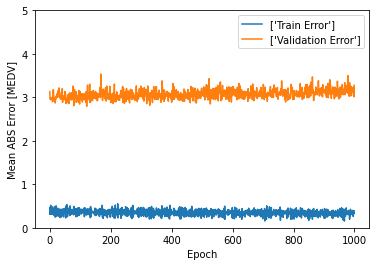

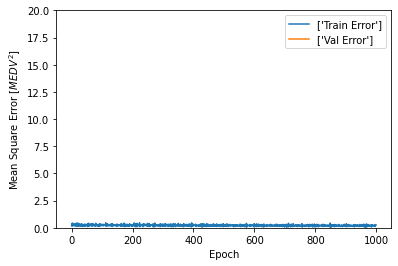

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean ABS Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'], label=['Train Error'])
  plt.plot(hist['epoch'], hist['val_mae'], label=['Validation Error'])
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'], label=['Train Error'])
  plt.plot(hist['epoch'], hist['val_mse'], label=['Val Error'])
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

- This Graph shows little improvement, or actually a fairly severe degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.


- So, looking at it we can say that the number of epochs should be around 200 or less, because after 200 epochs the validation error increases. This implies overfitting of the model. We need to train till 200 or less epochs.
- Now the question comes is it only after model validation and graph we will get to know or is there any other way ? Yes - By Regularization technique (Early stopping, drop out layer etc). 


In [ ]:
model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
    normed_train_data, train_labels,                 
    epochs=EPOCHS, validation_split = 0.2, verbose=1, callbacks =[early_stop, PrintDot()])

Epoch 1/1000
9/9 [==============================] - 1s 28ms/step - loss: 537.0841 - mae: 21.6184 - mse: 537.0841 - mape: 98.2190 - val_loss: 623.7789 - val_mae: 22.8384 - val_mse: 623.7789 - val_mape: 92.0724
Epoch 2/1000
9/9 [==============================] - 0s 6ms/step - loss: 454.5726 - mae: 19.6745 - mse: 454.5726 - mape: 90.0207 - val_loss: 566.1119 - val_mae: 21.4891 - val_mse: 566.1119 - val_mape: 84.9936
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 393.6138 - mae: 18.1556 - mse: 393.6138 - mape: 82.3026 - val_loss: 504.6715 - val_mae: 20.0360 - val_mse: 504.6715 - val_mape: 78.3843
Epoch 4/1000
9/9 [==============================] - 0s 6ms/step - loss: 351.7838 - mae: 16.6211 - mse: 351.7838 - mape: 72.5498 - val_loss: 436.3419 - val_mae: 18.4283 - val_mse: 436.3419 - val_mape: 72.0969
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 332.9376 - mae: 15.6983 - mse: 332.9376 - mape: 64.6969 - val_loss: 365.1270 - val_mae: 16.6420

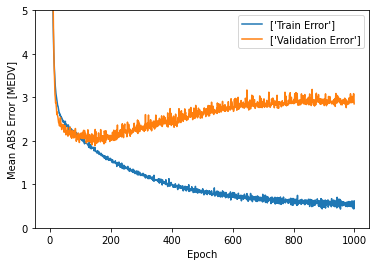

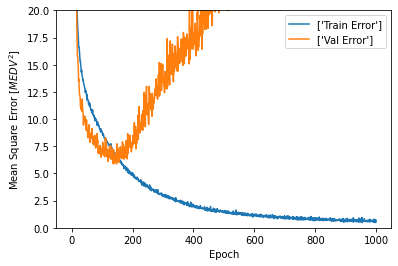

In [ ]:
plot_history(history)

In [ ]:
mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print('Testing set Mean Squared Error:',mse)

Testing set Mean Squared Error: [11.015918731689453, 2.2245054244995117, 11.015918731689453, 12.080122947692871]


**Predictions:**
- Predict MEDV 

In [ ]:
test_pred = model.predict(normed_test_data).flatten()
train_pred = model.predict(normed_train_data).flatten()

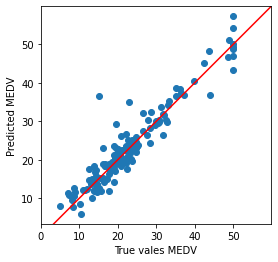

In [ ]:
plt.scatter(test_labels, test_pred)
plt.xlabel('True vales MEDV')
plt.ylabel('Predicted MEDV')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.xlim([0, plt.ylim()[1]])
plt.plot([-100,100],[-100,100],color='red')
plt.show()

**Compute R2 value for both test and train set using SKLEARN methods:**

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
#R2 for test set:
print(r2_score(test_labels, test_pred))

#R2 for train set:
print(r2_score(train_labels, train_pred))

0.8887001131792517
0.9260145266336989
